## Sales Analysis Project: In-depth Exploration of Sales Data
The Sales Analysis Project aims to analyze sales data from a dataset containing information about various customer orders. The purpose of this project is to derive meaningful insights that can help businesses optimize their operations and understand customer purchasing patterns. By applying data exploration, cleaning, and visualization techniques, the project will focus on uncovering hidden trends and relationships in the sales data.

This project demonstrates the process of analyzing a sales dataset using Python and powerful data science libraries such as pandas, numpy, matplotlib, and seaborn. These tools allow us to manipulate, analyze, and visualize the data in a manner that can lead to actionable insights and help businesses make informed decisions regarding sales strategies, product offerings, and customer targeting.

### Key Features of the Sales Analysis

1. Data Import and Preparation: The project begins by importing the necessary Python libraries, including pandas for data manipulation, numpy for numerical operations, and matplotlib and seaborn for data visualization. The dataset, which is stored in the .feather format, is loaded into a pandas DataFrame using the read_feather() function. Feather is an efficient, lightweight binary file format that helps in speeding up data read and write operations for large datasets.

- pandas: A powerful data manipulation library to load, clean, and explore the dataset.
- numpy: A library used for handling numerical operations and array-based computations.
- matplotlib & seaborn: Visualization libraries that help in creating charts and graphs to explore trends and patterns in the data.

2. Dataset Exploration: After loading the dataset, the initial step is to inspect the first few records of the data using the head() function to understand the structure and contents of the dataset. The dataset includes the following columns:

- Order ID: The unique identifier for each order.
- Product: The name of the product purchased.
- Quantity Ordered: The number of units of the product purchased.
- Price Each: The price of a single unit of the product.
- Order Date: The date and time when the order was placed.
- Purchase Address: The shipping address of the customer.

By using the shape method, we also confirm the number of rows and columns in the dataset, which helps in understanding the data's size. This initial inspection helps identify the dataset’s dimensions and gives a sense of the data we're working with.

3. Handling Missing Values: Data often comes with missing values, which can arise from various sources, including incomplete orders or errors during data entry. We check for any missing data using isnull().sum(), which counts the number of missing entries in each column. Identifying missing data is critical, as it can affect the accuracy of any analysis or model. In this case, rows containing entirely null values are dropped using dropna(). By removing rows with missing information, we ensure that our dataset is clean and ready for further analysis.

4. Data Visualization: Visualization is a crucial aspect of data analysis because it helps to intuitively understand the relationships and trends in the data. Using matplotlib and seaborn, various visualizations can be created to answer key business questions such as:

- Which products are the best-sellers?
- What are the sales trends over time (e.g., by month or year)?
- How does the quantity ordered vary across different products?
- Where are the majority of customers located?

Some common types of visualizations include:

- Bar Charts: To show sales performance by product.
- Time Series Plots: To visualize sales trends over time.
- Geographical Maps: To visualize the location of customers.
- Histograms and Box Plots: To explore the distribution of quantities and prices.

5. Data Cleaning and Transformation: A clean dataset is essential for performing effective analysis. In addition to dropping rows with missing values, it is important to transform data into the correct formats. This may involve converting the Order Date column from a string to a datetime object, which will enable us to easily filter and group data by time. We also remove any irrelevant or duplicate rows, ensuring that the dataset accurately represents real-world sales transactions.

6. Analyzing Insights: The goal of this project is not only to clean and visualize the data but to derive actionable insights that can influence business strategy. The project will explore questions such as:

- Which product categories generate the most revenue?
- Are there seasonal patterns in sales, such as increased sales during certain months?
- What are the top cities or regions where the most products are being sold?
- Can we identify any unusual patterns (e.g., bulk orders) that could suggest fraud or errors?

Answering these questions through the dataset allows businesses to fine-tune their strategies, improve their marketing efforts, and better understand their customer base.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_feather(r"Data\Sales_data.ftr")

In [145]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [146]:
df.shape

(186850, 6)

In [147]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [148]:
df = df.dropna(how = "all")

In [149]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [150]:
df = df.drop_duplicates()

In [151]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [152]:
df.shape

(185687, 6)

### ANALYZING MONTHLY SALES

#### Which is the best month for sales

In [153]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [154]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [155]:
df.order_date[0]

'04/19/19 08:46'

In [156]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [157]:
df.order_date[0].split('/')[0]

'04'

In [158]:
def return_month(x):
    return x.split('/')[0]

In [159]:
df['month'] = df.order_date.apply(return_month)

In [160]:
df.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
month               object
dtype: object

In [161]:
df.month.unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [162]:
filter1 = df['month'] == 'Order Date'

In [163]:
df[filter1]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [164]:
df = df[~filter1]

In [165]:
df.shape

(185686, 7)

In [166]:
df.month = df['month'].astype(int)

In [167]:
df['quantity_ordered'] = df['quantity_ordered'].astype(int)
df['price_each'] = df['price_each'].astype(float)

In [168]:
df.dtypes

order_id             object
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
month                 int64
dtype: object

In [169]:
df['sales'] = df['quantity_ordered'] * df['price_each']

In [170]:
df.groupby(['month'])['sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='month'>

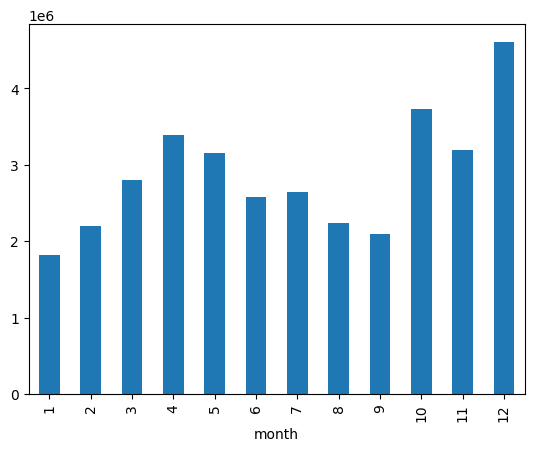

In [171]:
df.groupby(['month'])['sales'].sum().plot(kind='bar')

<Axes: ylabel='sales'>

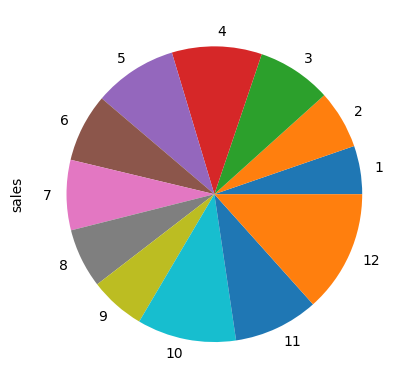

In [172]:
df.groupby(['month'])['sales'].sum().plot(kind='pie')

### ANALYZING WHICH CITY HAS THE MAXIMUM ORDERS

In [173]:
df.head(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [174]:
df.purchase_address[0]

'917 1st St, Dallas, TX 75001'

In [175]:
df.purchase_address[0].split(',')[1]

' Dallas'

In [176]:
df['city'] = df.purchase_address.str.split(',').str.get(1)

In [177]:
df.groupby(['city'])['sales'].sum()

city
Atlanta          2794199.07
Austin           1818044.33
Boston           3658627.65
Dallas           2765373.96
Los Angeles      5448304.28
New York City    4661867.14
Portland         2319331.94
San Francisco    8254743.55
Seattle          2745046.02
Name: sales, dtype: float64

In [178]:
pd.value_counts(df.city)

C:\Users\palab\AppData\Local\Temp\ipykernel_12304\3680118112.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.city)


city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

C:\Users\palab\AppData\Local\Temp\ipykernel_12304\2048065450.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.city).plot(kind = 'pie')


<Axes: ylabel='count'>

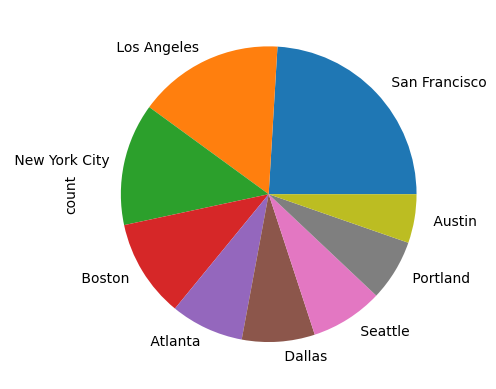

In [179]:
pd.value_counts(df.city).plot(kind = 'pie')

C:\Users\palab\AppData\Local\Temp\ipykernel_12304\57425868.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.city).plot(kind = 'pie', autopct = '%1.0f%%')


<Axes: ylabel='count'>

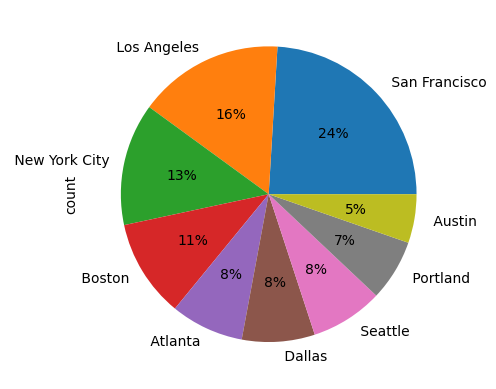

In [180]:
pd.value_counts(df.city).plot(kind = 'pie', autopct = '%1.0f%%')

<Axes: ylabel='sales'>

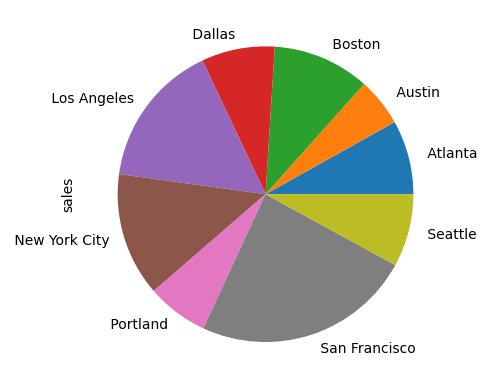

In [181]:
df.groupby(['city'])['sales'].sum().plot(kind='pie')

### PRODUCT SOLD THE MOST & WHY

In [182]:
count_df = df.groupby(['product']).agg({'quantity_ordered':'sum', 'price_each':'sum'})

In [183]:
count_df = count_df.reset_index()

C:\Users\palab\AppData\Local\Temp\ipykernel_12304\1343123743.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(count_df['product'].values, rotation = 45, fontsize = 6)


Text(0, 0.5, 'Average price of Product')

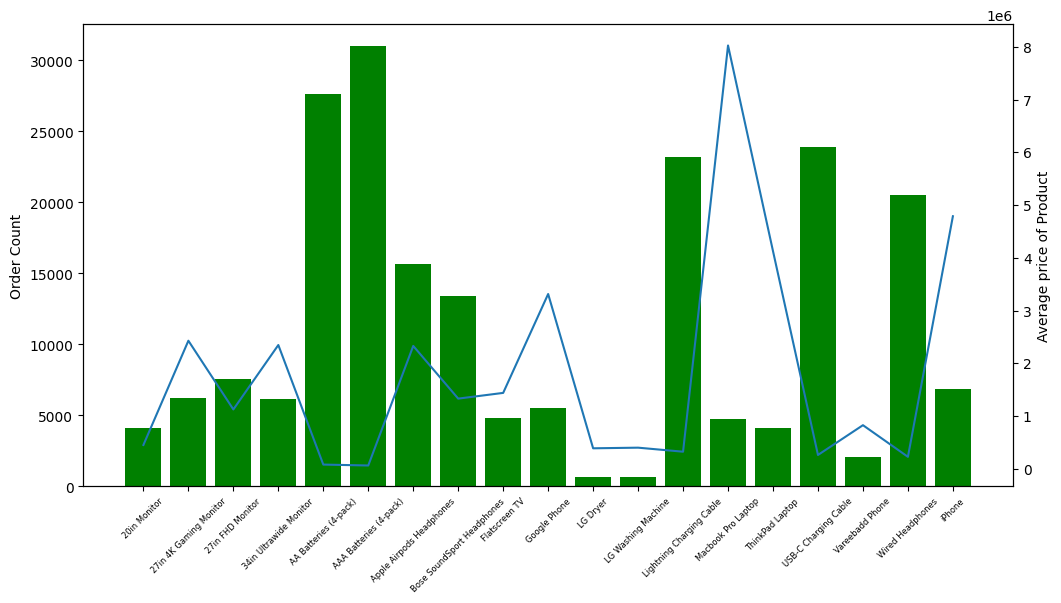

In [184]:
fig , ax1 = plt.subplots(figsize = (12,6))

ax2 = ax1.twinx()

ax1.bar(count_df['product'] , count_df['quantity_ordered'], color = 'g')
ax2.plot(count_df['product'] , count_df['price_each'])
ax1.set_xticklabels(count_df['product'].values, rotation = 45, fontsize = 6)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Average price of Product')


C:\Users\palab\AppData\Local\Temp\ipykernel_12304\3393122349.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_max['product'], rotation=30, ha='right', fontsize=10)


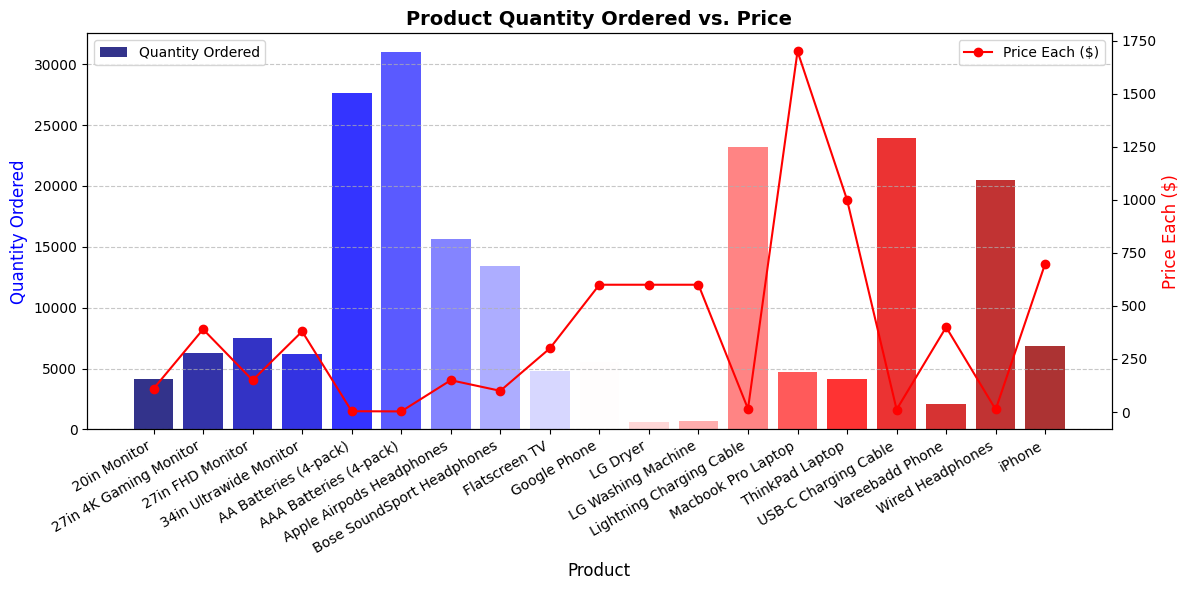

In [185]:
df_max = df.groupby('product').agg({'quantity_ordered':'sum', 'price_each':'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bar_colors = sns.color_palette("seismic", len(df_max))
ax1.bar(df_max['product'], df_max['quantity_ordered'], color=bar_colors, alpha=0.8, label='Quantity Ordered')

ax2.plot(df_max['product'], df_max['price_each'], color='red', marker='o', label='Price Each ($)')

ax1.set_xticklabels(df_max['product'], rotation=30, ha='right', fontsize=10)

ax1.set_xlabel("Product", fontsize=12)
ax1.set_ylabel("Quantity Ordered", fontsize=12, color='blue')
ax2.set_ylabel("Price Each ($)", fontsize=12, color='red')
plt.title("Product Quantity Ordered vs. Price", fontsize=14, weight='bold')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### UNDERSTANDING TREND OF THE MOST SOLD PRODUCT

In [186]:
df['product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='product')

In [187]:
m_s_p = df['product'].value_counts()[0:5].index

In [188]:
m_s_p_d = df[df['product'].isin(m_s_p)]

In [189]:
m_s_p_d.head(4)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [190]:
m_s_p_d.groupby(['month', 'product']).size()

month  product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [191]:
m_s_p_d.groupby(['month', 'product']).size().unstack()

product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


In [192]:
p_table = m_s_p_d.groupby(['month', 'product']).size().unstack()

<Axes: xlabel='month'>

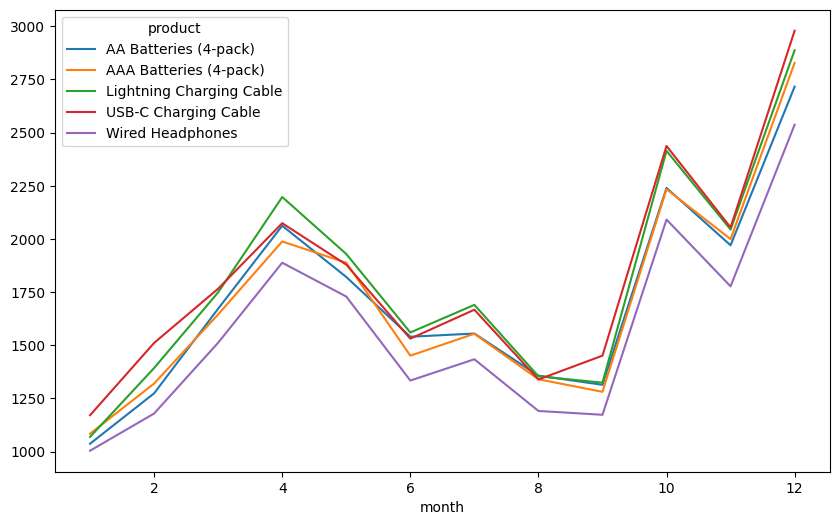

In [193]:
p_table.plot(figsize=(10,6))

### ANALYSING WHICH PRODUCTS ARE MOST OFTEN SOLD TOGETHER

In [194]:
df_dup = df[df['order_id'].duplicated(keep=False)]

In [195]:
df_dup

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [196]:
gr_pr = df_dup.groupby(['order_id'])['product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'product':'grouped_products'})

In [197]:
gr_pr_df = df_dup.merge(gr_pr, how = 'left', on = 'order_id')

In [198]:
gr_pr_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [199]:
nodup_df = gr_pr_df.drop_duplicates(subset=['order_id'])

In [200]:
nodup_df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='count'>

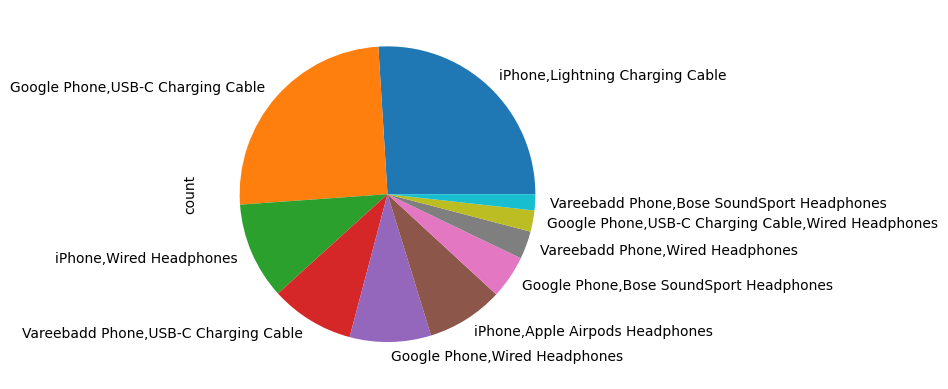

In [201]:
nodup_df['grouped_products'].value_counts()[0:10].plot.pie()